Моделирање и симулација

**Природниот имунитет** се стекнува така што се заразуваме од некоја бактерија или вирус ја прележуваме таа патогена болест и стекнуваме Природен имунитет.  
**Имунитетот стекнат преку вакцина** како што кажува и самиот збор тој имунитет го добиваме ако се вакцинираме.  
**Антителата** ни помагаат да не се заразиме повторно од патогената болест и што е најважно од се ни дава како еден вид на штит за да не може да им пренесуваме на другите луѓе бактерија или вирус.  

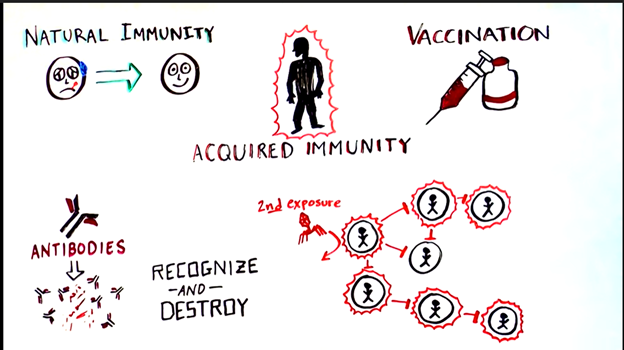

**Spreding factor** т.е фактор на ширење на заразата ако го земеме **Ro** да е 5 тоа ќе значи како единка ќе може на секо 5 луѓе да го пренесеме вирусот. Што значи дека многу повеќе луѓе ќе треба да створат имунитет за да стекнат некои антитела и за да се направи имунитет на стадо. Колку е поголем бројот на Ro толку повеќе луѓе се потребни да стегнат имунитет а колку е помал бројот толку помалку луѓе се потребни и полесно ќе се сопре ширењето на самиот вирус.  
За Ковид – 19 според истражувањата Ro е околу 3.  
**Формулата е Ro - 1/ Ro**  

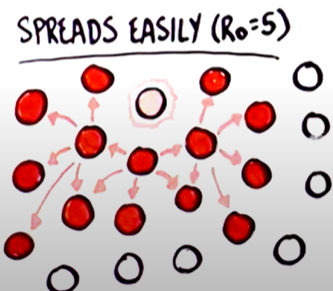

#SIR модел
**Susceptible** – Популација подлежна на болест. За Сарс-Ковид-2 претпоставката е дека сите што не ја прележале болеста се подлежни на инфекција.  
**Infectious** – Популација која е инфицирана.  
**Recovered** – Популација која оздравела од инфекцијата и се смета дека повеќе не е подлежна на болеста.  
Во кодот кој се наоѓа под оваа келија се поставуваат параметрите на Ro да е 3 т.е Едно лице да може да зарази други 3 лица.
Се поставуваат и параметрите колку да бидат инфицирани и колку оздравени. Според формулата на SIR моделот се пресметуваат и на крајот се прикажуваат на график.  

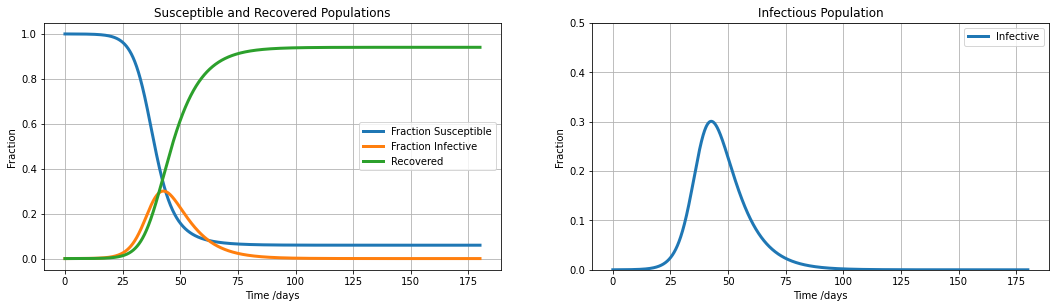

<Figure size 432x288 with 0 Axes>

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# parameter values
R0 = 3
t_infective = 8

# initial number of infected and recovered individuals
i_initial = 1 / 20000
r_initial = 0.00
s_initial = 1 - i_initial - r_initial

gamma = 1 / t_infective
beta = R0 * gamma


# SIR model differential equations.
def deriv(x, t, beta, gamma):
    s, i, r = x
    dsdt = -beta * s * i
    didt = beta * s * i - gamma * i
    drdt = gamma * i
    return [dsdt, didt, drdt]


t = np.linspace(0, 180, 2000)
x_initial = s_initial, i_initial, r_initial
soln = odeint(deriv, x_initial, t, args=(beta, gamma))
s, i, r = soln.T
e = None


def plotdata(t, s, i, e=None):
    # plot the data
    fig = plt.figure(figsize=(18, 10))
    ax = [fig.add_subplot(221, axisbelow=True),
          fig.add_subplot(222)]

    ax[0].plot(t, s, lw=3, label='Fraction Susceptible')
    ax[0].plot(t, i, lw=3, label='Fraction Infective')
    ax[0].plot(t, r, lw=3, label='Recovered')
    ax[0].set_title('Susceptible and Recovered Populations')
    ax[0].set_xlabel('Time /days')
    ax[0].set_ylabel('Fraction')

    ax[1].plot(t, i, lw=3, label='Infective')
    ax[1].set_title('Infectious Population')
    if e is not None: ax[1].plot(t, e, lw=3, label='Exposed')
    ax[1].set_ylim(0, 0.5)
    ax[1].set_xlabel('Time /days')
    ax[1].set_ylabel('Fraction')

    for a in ax:
        a.grid(True)
        a.legend()
    plt.show()
    plt.tight_layout()


plotdata(t, s, i)


#Вакцинација во одредени држави со live data
Првиот чекор  е да ги лоадираме податоците и ги читаме по датуми.Бидејќи за некои денови фалат податоци ги пополнуваме со помош на методот method=’ffill’ т.е пополнете ги сите вредности што недостасуваат за најдобра проценка.  	
Правиме матрица која е со големина 19x10. 
Користиме индекси за:  
**X**- Оската тоа се датумите.  
**Y**-Оската се користи порпорција на вакцинирани лица.  
Кога ќе се изврши кодот ќе се добијат податоци за процентуално колку се вакцинирани од земјата која сме ја внеле.

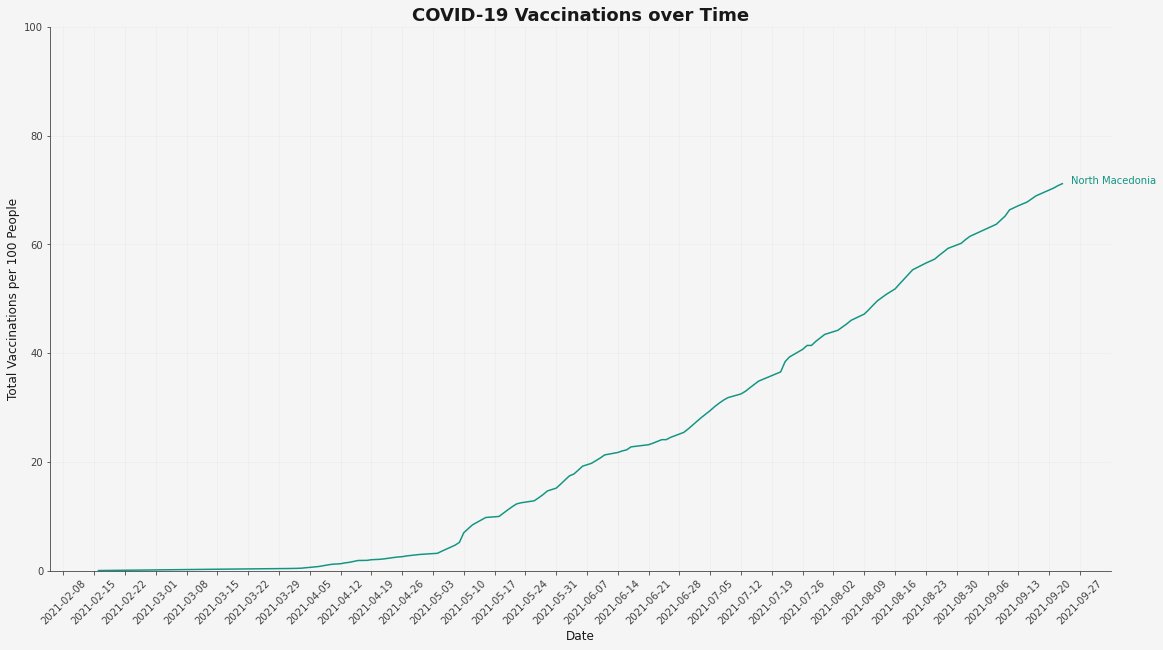

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator
from datetime import timedelta
df = pd.read_csv(
    'https://covid.ourworldindata.org/data/owid-covid-data.csv',

    usecols=['date', 'location', 'total_vaccinations_per_hundred'],
    parse_dates=['date'])

countries = ['North Macedonia']
df = df[df['location'].isin(countries)]
pivot = pd.pivot_table(
    data=df,                                    # What dataframe to use
    index='date',                               # The "rows" of your dataframe
    columns='location',                         # What values to show as columns
    values='total_vaccinations_per_hundred',    # What values to aggregate
    aggfunc='mean',                             # How to aggregate data
    )

pivot = pivot.fillna(method='ffill')

main_country = 'North Macedonia'
colors = {country: ('grey' if country != main_country else '#129583') for country in countries}
alphas = {country: (0.75 if country != main_country else 1.0) for country in countries}
fig, ax = plt.subplots(figsize=(19, 10))
fig.patch.set_facecolor('#F5F5F5')    # Change background color to a light grey
ax.patch.set_facecolor('#F5F5F5')     # Change background color to a light grey

for country in countries:
    ax.plot(
        pivot.index,              # What to use as your x-values
        pivot[country],           # What to use as your y-values
        color=colors[country],    # How to color your line
        alpha=alphas[country]     # What transparency to use for your line
    )
    ax.text(
        x=pivot.index[-1] + timedelta(days=2),    # Where to position your text relative to the x-axis
        y=pivot[country].max(),                   # How high to position your text
        color=colors[country],                    # What color to give your text
        s=country,                                # What to write
        alpha=alphas[country]                       # What transparency to use
    )
    date_form = DateFormatter("%Y-%m-%d")
    ax.xaxis.set_major_locator(WeekdayLocator(byweekday=0, interval=1))
    ax.xaxis.set_major_formatter(date_form)
    plt.xticks(rotation=45)
    plt.ylim(0, 100)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color('#3f3f3f')
    ax.spines['left'].set_color('#3f3f3f')
    ax.tick_params(colors='#3f3f3f')
    ax.grid(alpha=0.1)

    plt.ylabel('Total Vaccinations per 100 People', fontsize=12, alpha=0.9)
    plt.xlabel('Date', fontsize=12, alpha=0.9)
    plt.title('COVID-19 Vaccinations over Time', fontsize=18, weight='bold', alpha=0.9)

    plt.show()


#Barabási–Albert model
Многу набљдувани мрежи (барем приближно) спаѓаат во класата на *scale-free* мрежи, што значи дека тие имаат дистрибуција на *power-law* (или *scale-free*), додека моделите на случајни графови како што се моделот Ердес-Рени (ER) и Моделот Вотс-Строгатц (WS) не покажува power-law.Моделот Барабиши-Алберт е еден од неколкуте предложени модели кои генерираат *scale-free* мрежи.
Во кодот поставуваме да има еден инфициран тоа да биде бројот 33, поставуваме број на популација (N) да е 100 луѓе. Според тоа инфицираноста на лицата кои се од 0 - 20 години имаат 35% веројатност да заразат некого, лицата од 21-39 години имаат 60% веројатност, од 40-59 години 42% веројатност на заразување, 60-79 години 20% веројатност и од 80+ години имаат 10% веројатност. Процентите може да се менуваат исто така може да се менуваат и старосните групи.

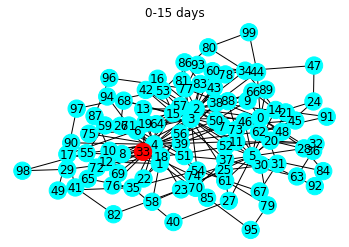

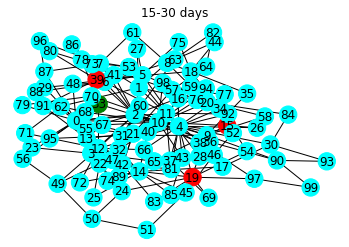

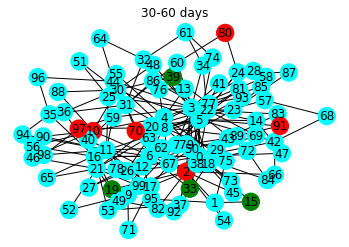

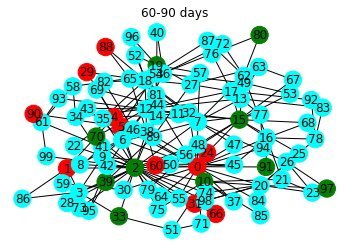

In [4]:
import random

import networkx as nx
from matplotlib import pyplot as plt
from matplotlib.widgets import Button
import numpy as np

# colors
healed = []
infected = [33]
G = None
infection_chance = 0 #chance to infect
N = 100 #population

# we are creating only one graph
# G = nx.Graph()

def generate_graph(n):
    global G, healed, susceptible, infected

    # n - number of people(population)
    # contacts - random contacts between people
    # danger => easy(green), medium(bluish), high(red)

    if(G is not None):    # write the infected logic here
        healed = healed + infected
        temp_infected = []
        for infected_person in infected:
            for neighbor in G.neighbors(infected_person):
                rolled_chance = random.random()

                if infected_person >= 0 and infected_person<0.33*n:#0-20 godini 33.1%
                    infection_chance=0.35
                elif infected_person>=0.33*n and infected_person<=0.63*n:#20-39 godini 29.9%
                    infection_chance=0.60
                elif infected_person>0.63*n and infected_person<=0.86*n:#40-59 godini 23.1%
                    infection_chance=0.42
                elif infected_person>0.86*n and infected_person<=0.98*n: #60-79 godini 11.9%
                    infection_chance=0.2
                elif infected_person>0.98*n and infected_person<=n: #80> godini 2.0%
                    infection_chance=0.1

                if rolled_chance<=infection_chance and neighbor not in infected and neighbor not in healed:
                    temp_infected.append(neighbor)

        infected=temp_infected

    G = nx.barabasi_albert_graph(n, 2)

    color_map = []
    for node in G:
        if node in healed:
            color_map.append('green')
        elif node in infected:
            color_map.append('red')
        else:
            color_map.append('cyan')

    nx.draw(G, node_color=color_map, with_labels=True)
plt.title('0-15 days')
generate_graph(N)
plt.show()

plt.title('15-30 days')
generate_graph(N)
plt.show()

plt.title('30-60 days')
generate_graph(N)
plt.show()

plt.title('60-90 days')
generate_graph(N)
plt.show()

